In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.duplicated().sum()

0

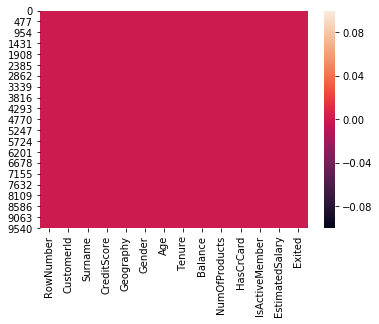

In [8]:
#To check Missing values
sns.heatmap(data.isnull())

In [49]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [50]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Label Encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [10]:
data['Surname']= le.fit_transform(data['Surname']) 
data['Geography']= le.fit_transform(data['Geography']) 
data['Gender']= le.fit_transform(data['Gender'])

In [11]:
df=data.drop(['RowNumber','CustomerId'],axis=1)

In [12]:
df.head(2)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0


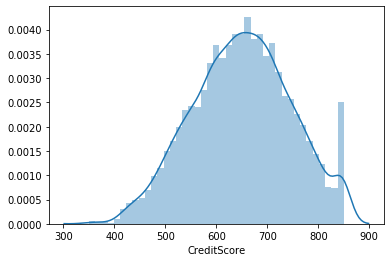

In [13]:
sns.distplot(df["CreditScore"])

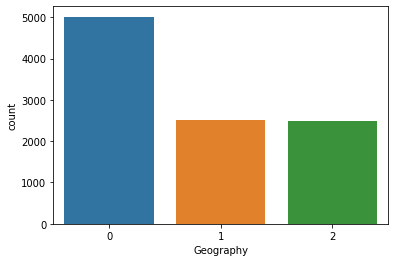

In [62]:
sns.countplot(x="Geography",data=df)

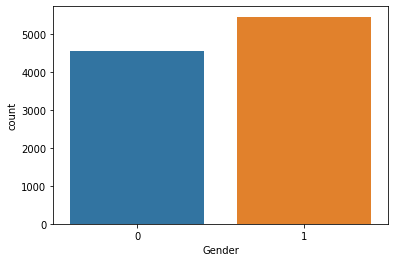

In [63]:
sns.countplot(x="Gender",data=df)

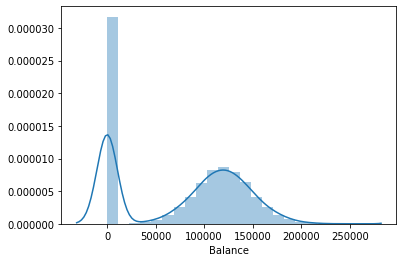

In [64]:
sns.distplot(df["Balance"])

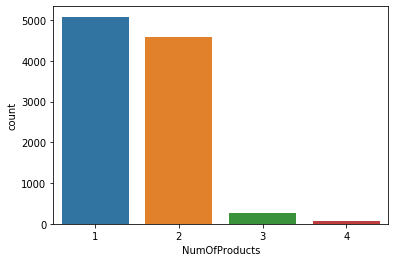

In [65]:
sns.countplot(x='NumOfProducts',data=df)

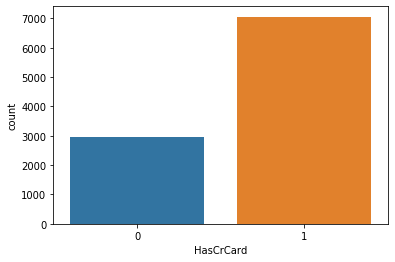

In [66]:
sns.countplot(x='HasCrCard',data=df)

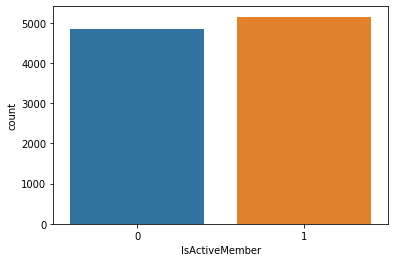

In [67]:
sns.countplot(x='IsActiveMember',data=df)

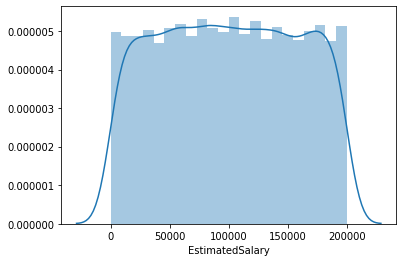

In [56]:
sns.distplot(df["EstimatedSalary"])

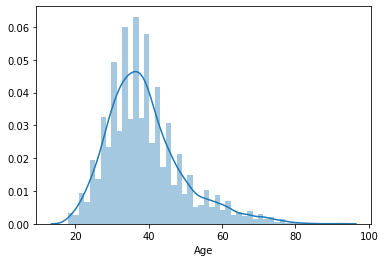

In [57]:
sns.distplot(df["Age"])

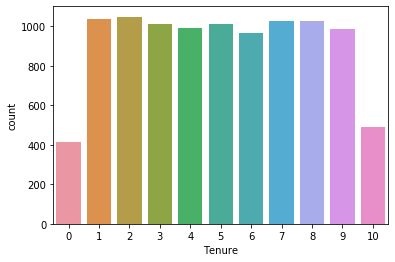

In [59]:
sns.countplot(x='Tenure',data=df)

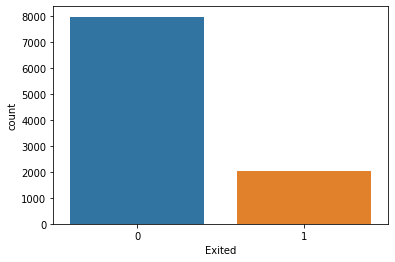

In [68]:
sns.countplot(x="Exited",data=df)

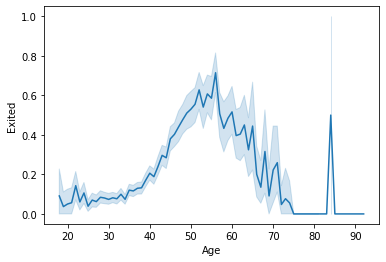

In [70]:
sns.lineplot(y="Exited",x="Age",data=df)

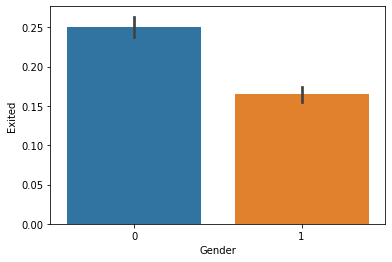

In [71]:
sns.barplot(y="Exited",x="Gender",data=df)

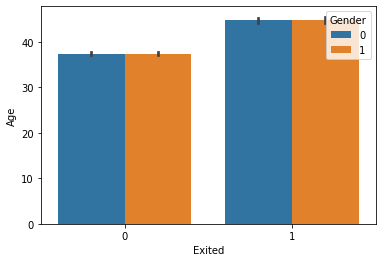

In [74]:
sns.barplot(x="Exited",y="Age",hue="Gender",data=df)

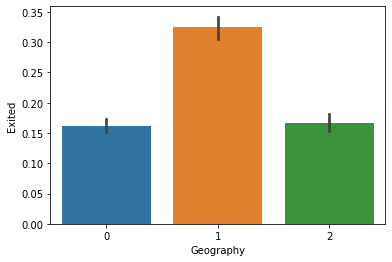

In [79]:
sns.barplot(y="Exited",x="Geography",data=df)

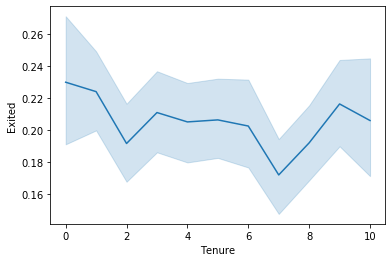

In [82]:
sns.lineplot(y="Exited",x="Tenure",data=df)

Summary Statistics

In [85]:
df.describe()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1507.774200,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,846.204311,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,0.000000,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,773.750000,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1542.000000,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,2238.250000,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,2931.000000,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [86]:
df.corr()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Surname,1.000000,0.007489,-0.022878,-0.002049,0.005550,-0.017412,0.002657,-0.016460,-0.008993,0.001483,0.011850,-0.010822
CreditScore,0.007489,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.022878,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002049,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.005550,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.017412,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.002657,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,-0.016460,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.008993,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001483,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


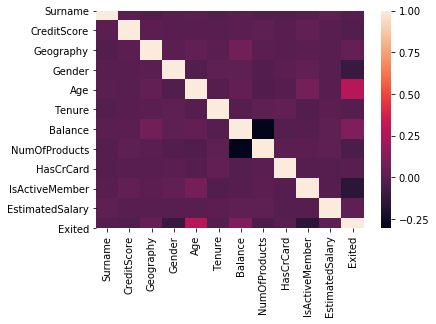

In [87]:
sns.heatmap(df.corr())

Plotting Outliers

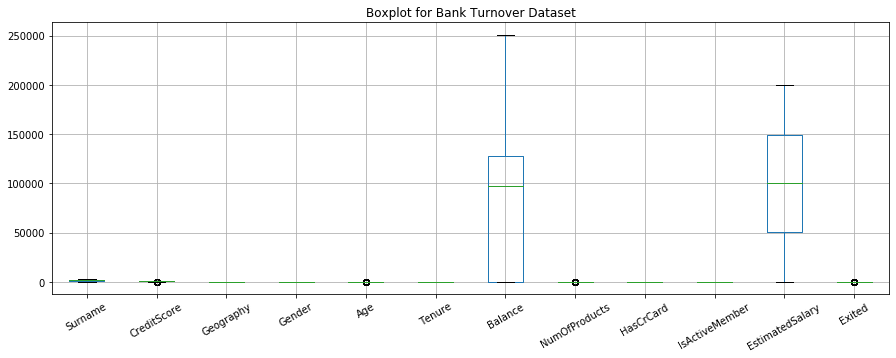

In [14]:
df.plot(kind='box',grid=True,title="Boxplot for Bank Turnover Dataset",legend=True,rot=30,figsize=(15,5))

In [15]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(df))
df=df.loc[(z_score < 3).all(axis=1)]
df.shape

(9799, 12)

In [16]:
#check skewsness
df.skew()

Surname           -0.021518
CreditScore       -0.054670
Geography          0.498375
Gender            -0.190912
Age                0.746641
Tenure             0.009423
Balance           -0.140120
NumOfProducts      0.420676
HasCrCard         -0.901171
IsActiveMember    -0.040222
EstimatedSalary    0.002568
Exited             1.501666
dtype: float64

In [17]:
for col in df.columns:
    if df.skew().loc[col] > 0.55:
        df[col]=np.log1p(df[col])
    if df.skew().loc[col]<=0.55:
        df[col]=np.log1p(df[col])

In [18]:
df.skew()

Surname           -1.887523
CreditScore       -0.418102
Geography          0.270082
Gender            -0.190912
Age               -0.101236
Tenure            -0.899672
Balance           -0.570061
NumOfProducts      0.231774
HasCrCard         -0.901171
IsActiveMember    -0.040222
EstimatedSalary   -2.001354
Exited             1.501666
dtype: float64

Features and Target Value

In [20]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [21]:
x.head(2)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,7.017506,6.429719,0.000000,0.0,1.560500,1.098612,0.000000,0.693147,0.693147,0.693147,11.526334
1,7.071573,6.411818,1.098612,0.0,1.555545,0.693147,11.336294,0.693147,0.000000,0.693147,11.631096


In [22]:
y.head(2)

0    0.693147
1    0.000000
Name: Exited, dtype: float64

In [23]:
y=y.round().astype(int)
y.unique()

array([1, 0], dtype=int64)

In [24]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int32

Standardisation 

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
x=sc.fit_transform(x)
x

array([[-0.02540357, -0.25235032, -0.95023803, ...,  0.64628121,
         0.98009399,  0.31856475],
       [ 0.03254461, -0.37006466,  1.38708666, ..., -1.54731406,
         0.98009399,  0.4232271 ],
       [ 0.6216184 , -1.62753779, -0.95023803, ...,  0.64628121,
        -1.0203103 ,  0.43548171],
       ...,
       [ 0.34110401,  0.63896647, -0.95023803, ..., -1.54731406,
         0.98009399, -0.55945046],
       [ 0.77088723,  1.198     ,  0.52444966, ...,  0.64628121,
        -1.0203103 ,  0.23147966],
       [ 0.94196069,  1.36597276, -0.95023803, ...,  0.64628121,
        -1.0203103 , -0.65646686]])

Spilt Train and Test

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [28]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        fpr,tpr,thresholds=roc_curve(y_test,pred)
        roc_auc=auc(fpr,tpr)

        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    #print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    print("fpr: ",fpr)
    print("tpr: ",tpr)
    print("thresholds: ",thresholds)
    print("roc_auc: ",roc_auc)
    print()
    print('prediction: ',pred)
     

    plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
    plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
    plt.legend(loc='best',fontsize='medium',shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
    plt.show()
    
    return random_state

Logistic Regression

random_state for mod  is  35 which gives accuracy score of:  0.8493197278911565
confusion matrix:  [[2260   65]
 [ 463  152]]
classification report:                precision    recall  f1-score   support

           0       0.83      0.97      0.90      2325
           1       0.70      0.25      0.37       615

    accuracy                           0.82      2940
   macro avg       0.77      0.61      0.63      2940
weighted avg       0.80      0.82      0.78      2940

fpr:  [0.         0.02795699 1.        ]
tpr:  [0.         0.24715447 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6095987411487018

prediction:  [1 0 0 ... 0 0 0]


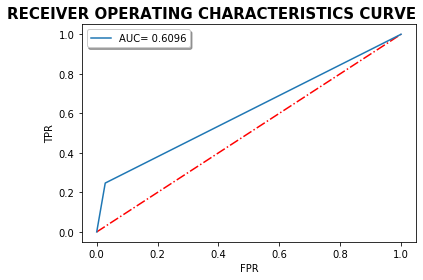

In [107]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

In [112]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_1

0.82722547618442

DecisionTree

In [115]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'entropy', 'max_depth': 7}

random_state for mod  is  117 which gives accuracy score of:  0.8741496598639455
confusion matrix:  [[2236   89]
 [ 367  248]]
classification report:                precision    recall  f1-score   support

           0       0.86      0.96      0.91      2325
           1       0.74      0.40      0.52       615

    accuracy                           0.84      2940
   macro avg       0.80      0.68      0.71      2940
weighted avg       0.83      0.84      0.83      2940

fpr:  [0.         0.03827957 1.        ]
tpr:  [0.         0.40325203 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6824862313139259

prediction:  [1 0 0 ... 0 0 0]


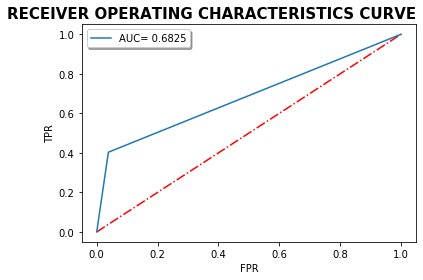

In [116]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=7)
dtc=rst(dt,x,y)

In [122]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=15).mean()
accuracy_score_3

0.8541658740488909

GaussianNB

random_state for mod  is  35 which gives accuracy score of:  0.8452380952380952
confusion matrix:  [[2255   70]
 [ 462  153]]
classification report:                precision    recall  f1-score   support

           0       0.83      0.97      0.89      2325
           1       0.69      0.25      0.37       615

    accuracy                           0.82      2940
   macro avg       0.76      0.61      0.63      2940
weighted avg       0.80      0.82      0.78      2940

fpr:  [0.         0.03010753 1.        ]
tpr:  [0.         0.24878049 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6093364804615788

prediction:  [1 0 0 ... 0 0 0]


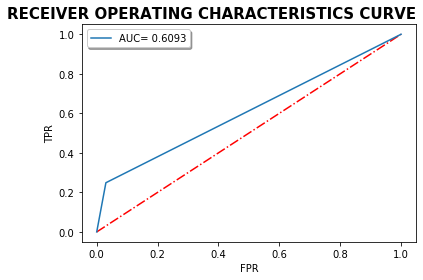

In [137]:
nb=GaussianNB()
gnb=rst(nb,x,y)

In [140]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=5).mean()
accuracy_score_4

0.8259008994134251

Gradient Boosting

In [29]:
gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=85)

gb_param= {"learning_rate": [0.0001,0.025,0.1,1.0], "n_estimators":[250,500,750,1000]}

gb_g= GridSearchCV(gb,gb_param,cv=15)
gb_g.fit(x_train,y_train)
print("best parameters:", gb_g.best_params_)
print("\n best score:",gb_g.best_score_)

best parameters: {'learning_rate': 0.025, 'n_estimators': 250}

 best score: 0.8581425863828547


random_state for mod  is  117 which gives accuracy score of:  0.8768707482993198
confusion matrix:  [[2257   68]
 [ 355  260]]
classification report:                precision    recall  f1-score   support

           0       0.86      0.97      0.91      2325
           1       0.79      0.42      0.55       615

    accuracy                           0.86      2940
   macro avg       0.83      0.70      0.73      2940
weighted avg       0.85      0.86      0.84      2940

fpr:  [0.         0.02924731 1.        ]
tpr:  [0.         0.42276423 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6967584579071597

prediction:  [1 0 0 ... 0 0 0]


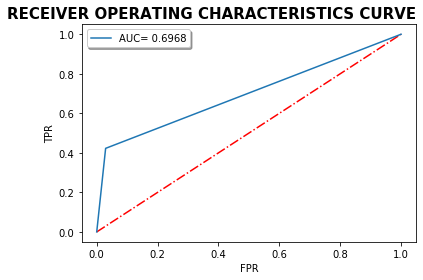

In [30]:
gb=GradientBoostingClassifier(learning_rate=0.025, n_estimators= 250)
gbc=rst(gb,x,y)

In [31]:
#Cross Validation
accuracy_score_5=cross_val_score(gb,x,y,scoring='accuracy',cv=5).mean()
accuracy_score_5

0.8609041849022573

In [ ]:
import joblib
joblib.dump(gb,"Gradient Boosting Classifier for Churn_Modelling dataset.pkl")